1.
Напишите текстом как минимум 6 функций распределения и соответствующие им функции правдоподобия.
Напишите, какие по вашему мнению целевые переменные из бизнеса (лучше - из страхового) соответствуют этим распределениям (по 2 примера на каждое).
Пример: биномиальное распределение для задачи моделирования пролонгации (продлил клиент полис на следующий период или нет).

Дискретные распределения:

* Биномиальное распределение,
* Геометрическое распределение,
* Гипергеометрическое распределение,
* Распределение Пуассона

Распределения непрерывной величины:

* Дифференциальная функция распределения или плотность вероятностей
* Интегральная функция распределения вероятностей
* Распределение Стьюдента (t-распределение) 

Еще о видах распределений тут - https://habr.com/ru/post/311092/

Примеры:
* Нормальное распределение - кол-во проданных полисов в рабочий день недели
* Биномиальное распределение (сумма независимых случайных величин) - произойдёт ли страховой случай в течение страхового периода
* Геометрическое распределение (описывает количество испытаний  до первого успеха при вероятности наступления успеха в каждом испытании) - через сколько месяцев после заключения договора наступает страховой случай. 
* Гипергеометрическое распределение (моделирует количество удачных выборок без возвращения из конечной совокупности) -то же, что и предыдущее; количество страховых случаев в корпоративном пакете договоров страхования за период. 
* Распределение Пуассона (интенсивность событий, то есть среднее количество событий в единицу времени) - сколько производится выплат в месяц; сколько поступает заявок в скоринг в единицу времени.

* Плотность вероятностей - вероятность получения суммы страховой премии.
* Распределение Стьюдента (зависимость двух непрерывных величин) - статистическая значимость зависимости доходности по договору от стажа водителя или возраста; 

2.
На основе датасета из ноутбука проведите анализ данных и постройте зависимости частоты и среднего убытка от какого-либо параметра (за исключением уже выполненных в ноутбуке).

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
df = pd.read_csv('freMPL-R.csv', low_memory=False)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343080 entries, 0 to 343079
Data columns (total 31 columns):
Exposure             343080 non-null float64
LicAge               343080 non-null int64
RecordBeg            343080 non-null object
RecordEnd            181115 non-null object
VehAge               177880 non-null object
Gender               343080 non-null object
MariStat             343080 non-null object
SocioCateg           343080 non-null object
VehUsage             343080 non-null object
DrivAge              343080 non-null int64
HasKmLimit           343080 non-null int64
BonusMalus           343080 non-null int64
VehBody              145780 non-null object
VehPrice             145780 non-null object
VehEngine            145780 non-null object
VehEnergy            145780 non-null object
VehMaxSpeed          145780 non-null object
VehClass             145780 non-null object
ClaimAmount          343080 non-null float64
RiskVar              145780 non-null float64
Garage    

In [13]:
df.head()

,Exposure,LicAge,RecordBeg,RecordEnd,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,...,ClaimInd,Dataset,DeducType,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea
0,0.583,366,2004-06-01,NaN,2,Female,Other,CSP1,Professional,55,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.200,187,2004-10-19,NaN,0,Male,Alone,CSP55,Private+trip to office,34,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.083,169,2004-07-16,2004-08-16,1,Female,Other,CSP1,Professional,33,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.375,170,2004-08-16,NaN,1,Female,Other,CSP1,Professional,34,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.500,224,2004-01-01,2004-07-01,3,Male,Other,CSP47,Professional,53,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Смотрим, какие факторы пропущены в каждом из датасетов

dct = {}
for i in range(1,11):
    _x = df.loc[df.Dataset == i].notnull().sum()
    dct[i] = list(_x[_x == 0].index)

print('Dataset  Missing Variables')
for x in range(1,11):
    print(x,'\t',dct[x])

Dataset  Missing Variables
1 	 ['DeducType', 'ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
2 	 ['DeducType', 'ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
3 	 ['ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
4 	 ['ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
5 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'RiskVar', 'Garage', 'DeducType']
6 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'RiskVar', 'Garage', 'DeducType']
7 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'RiskVar', 'Garage', 'DeducType']
8 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass

In [15]:
# Объединяем наборы данных 5-9, удаляем пустые столбцы, удаляем дубликаты

df59 = df.loc[df.Dataset.isin([5, 6, 7, 8, 9])]
df59 = df59.drop(['Dataset'], axis=1)
df59 = df59.dropna(axis=1, how='all')
print('With duplicates\t\t', len(df59))
df59 = df59.drop_duplicates()
print('Without duplicates\t', len(df59))

With duplicates		 165200
Without duplicates	 115155


In [16]:
df59.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115155 entries, 145780 to 310979
Data columns (total 20 columns):
Exposure             115155 non-null float64
LicAge               115155 non-null int64
RecordBeg            115155 non-null object
RecordEnd            59455 non-null object
Gender               115155 non-null object
MariStat             115155 non-null object
SocioCateg           115155 non-null object
VehUsage             115155 non-null object
DrivAge              115155 non-null int64
HasKmLimit           115155 non-null int64
BonusMalus           115155 non-null int64
ClaimAmount          115155 non-null float64
ClaimInd             115155 non-null int64
ClaimNbResp          115155 non-null float64
ClaimNbNonResp       115155 non-null float64
ClaimNbParking       115155 non-null float64
ClaimNbFireTheft     115155 non-null float64
ClaimNbWindscreen    115155 non-null float64
OutUseNb             115155 non-null float64
RiskArea             115155 non-null float64
d

In [18]:
df = df59

# Вспомогательный столбец для суммирования числа полисов
df['PolicyCount'] = 1

# Вспомогательный столбец для суммирования числа полисов с убытками
df['ClaimCount'] = df['ClaimAmount'] > 0
# df['ClaimCount'] = abs(df['ClaimAmount'])

# Вспомогательный столбец для суммирования числа полисов без убытков
df['NoClaimCount'] = df.PolicyCount - df.ClaimCount

df.head()





,Exposure,LicAge,RecordBeg,RecordEnd,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,...,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea,PolicyCount,ClaimCount,NoClaimCount
145780,0.083,332,2004-01-01,2004-02-01,Male,Other,CSP50,Professional,46,0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1,False,1
145781,0.916,333,2004-02-01,NaN,Male,Other,CSP50,Professional,46,0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1,False,1
145782,0.550,173,2004-05-15,2004-12-03,Male,Other,CSP50,Private+trip to office,32,0,...,0.0,2.0,0.0,0.0,0.0,0.0,7.0,1,False,1
145783,0.089,364,2004-11-29,NaN,Female,Other,CSP55,Private+trip to office,52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1,False,1
145784,0.233,426,2004-02-07,2004-05-01,Male,Other,CSP60,Private,57,0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1,False,1


In [20]:
df_group_age = df[['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount', 'NoClaimCount']].groupby(df['DrivAge']).sum()
df_group_age = df_group_age.reset_index()
df_group_age.head()

,DrivAge,Exposure,PolicyCount,ClaimAmount,ClaimCount,NoClaimCount
0,20,81.637,189,148885.858006,28.0,161
1,21,164.026,402,85952.677341,55.0,347
2,22,290.233,687,241769.777946,98.0,589
3,23,371.904,913,179928.090634,114.0,799
4,24,438.098,1094,272854.509970,128.0,966


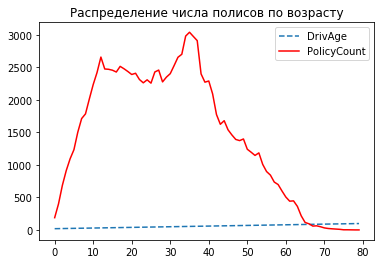

In [22]:
plt.plot(df_group_age['DrivAge'], linestyle='dashed', label='DrivAge' )
plt.plot(df_group_age['PolicyCount'],'r', label='PolicyCount')

plt.title('Распределение числа полисов по возрасту')
plt.legend()
plt.show()

In [ ]:
# зависимость частоты и среднего убытка от какого-либо параметра

In [27]:
df['VehUsage'].unique()

array(['Professional', 'Private+trip to office', 'Private',
       'Professional run'], dtype=object)

In [28]:
df_group_VehUsage = df[['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount', 'NoClaimCount']].groupby(df['VehUsage']).sum()
df_group_VehUsage = df_group_VehUsage.reset_index()
df_group_VehUsage['Freq'] = df_group_VehUsage.ClaimCount / df_group_VehUsage.Exposure
df_group_VehUsage['AvgClaim'] = df_group_VehUsage.ClaimAmount / df_group_VehUsage.ClaimCount

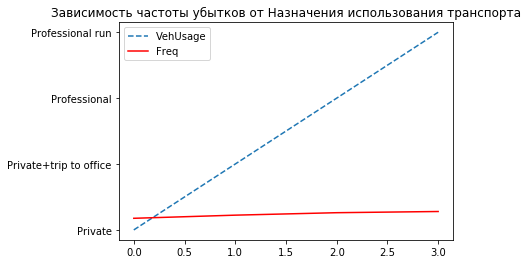

In [29]:
plt.plot(df_group_VehUsage['VehUsage'], linestyle='dashed', label='VehUsage' )
plt.plot(df_group_VehUsage['Freq'],'r', label='Freq')

plt.title('Зависимость частоты убытков от Назначения использования транспорта')
plt.legend()
plt.show()

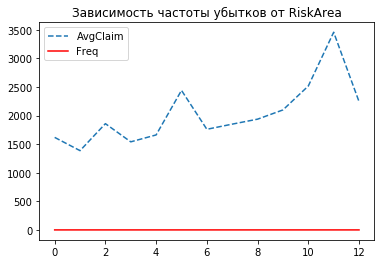

In [30]:
df_group_RiskArea = df[['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount', 'NoClaimCount']].groupby(df['RiskArea']).sum()
df_group_RiskArea = df_group_RiskArea.reset_index()
df_group_RiskArea['Freq'] = df_group_RiskArea.ClaimCount / df_group_RiskArea.Exposure
df_group_RiskArea['AvgClaim'] = df_group_RiskArea.ClaimAmount / df_group_RiskArea.ClaimCount

plt.plot(df_group_RiskArea['AvgClaim'], linestyle='dashed', label='AvgClaim' )
plt.plot(df_group_RiskArea['Freq'],'r', label='Freq')

plt.title('Зависимость частоты убытков от RiskArea')
plt.legend()
plt.show()